In [2]:
# reload magics
%load_ext autoreload
%autoreload 2

In [3]:
import colorcet as cc
import logging
import matplotlib.colors as mc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from copy import deepcopy



# create a palette dictionary that has the same keys as the original palette
palette = cc.glasbey_hv
palette_dict = {i: mc.to_hex(palette[i]) for i in range(len(palette))} # type: ignore

# add an entry for -1
palette_dict[-1] = '#ffffff'

# set default colour for seaborn heatmaps
sns.set_theme(style = "whitegrid", rc={'figure.figsize':(8,8)}, palette='viridis')


## LOAD DATA

In [4]:
# load the data from the xlsx file
# df = pd.read_excel('../lc-project-data/2024-04-09-DATASET-ML.xlsx')
# df = pd.read_excel('../lc-project-data/2024-04-10-DATASET.xlsx')

from pathlib import Path


p = Path('/Users/david/projects/lc2-1028/')
fn = "Biospecimen-Data-FINAL-n-1028-2024-07-18.xlsx"

df = pd.read_excel(p / fn, header = 0, engine='openpyxl')

In [5]:
df.shape

(1029, 776)

In [6]:
df

,record_id,sex,gender,age,home_location,living_with,country,employed,occupation,occupation2,...,dag,labelnumber,Sample_Label_ID,datetime_collection,datetime_freezing,aliquots,biospecimen_collection_not,biospecimen_used___1,matchnumber,biospecimen_complete
0,1.0,1.0,MALE,47.0,1.0,3.0,42,1.0,Engineering Technologist,7.0,...,1.0,1.0,LDN-0001,2023-12-15 15:10:00,2023-12-15 15:36:00,H,"Sample lipemic TV = 6 x 250uL (A-F), 2 x 500u...",1.0,NaN,2.0
1,2.0,2.0,NaN,37.0,1.0,1.0,16,0.0,NaN,NaN,...,1.0,2.0,LDN-0002,2023-12-18 08:15:00,2023-12-18 08:56:00,H,4 x 250uL (A-D) 4 x 500uL (E-H),1.0,NaN,2.0
2,3.0,2.0,FEMALE,54.0,1.0,1.0,16,1.0,Administrator,3.0,...,1.0,3.0,LDN-0003,2023-12-18 08:40:00,2023-12-18 09:05:00,H,5 x 250uL (A-E) 3 x 500uL (F-H),1.0,NaN,2.0
3,4.0,1.0,NaN,78.0,1.0,1.0,62,0.0,NaN,NaN,...,1.0,4.0,LDN-0004,2024-01-05 13:34:00,2024-01-05 14:28:00,G,NaN,1.0,NaN,2.0
4,5.0,2.0,FEMALE,33.0,1.0,1.0,16,1.0,Nurse,11.0,...,1.0,5.0,LDN-0005,2024-01-05 14:03:00,2024-01-05 14:55:00,G,"No Sample ""E""",1.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,6119.0,2.0,NaN,69.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,13.0,HC-0013,NaT,NaT,NaN,NaN,1.0,NaN,2.0
1025,6120.0,2.0,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,14.0,HC-0014,NaT,NaT,NaN,NaN,1.0,NaN,2.0
1026,6121.0,2.0,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,15.0,HC-0015,NaT,NaT,NaN,NaN,1.0,NaN,2.0
1027,6122.0,2.0,NaN,45.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,16.0,HC-0016,NaT,NaT,NaN,NaN,1.0,NaN,2.0


In [7]:
# drop the last row which is a set of totals
df = df.drop(df.index[-1])

In [8]:
# preserve a copy for experimentation; we can allways reset to this and faster than reloading the excel file
preserved_df = deepcopy(df)
preserved_df.shape

(1028, 776)

In [9]:
site_name_dict = {
                  1: 'LDN',
                  2: 'MTL',
                  3: 'SAN',
                  4: 'RIO',
                  5: 'LUS',
                }

## QA

In [10]:
df = preserved_df

In [11]:
# summarize the info about the dataframe
# note the number of columns of each type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Columns: 776 entries, record_id to biospecimen_complete
dtypes: datetime64[ns](14), float64(665), int64(80), object(17)
memory usage: 6.1+ MB


In [12]:
# A list of columns to drop
to_drop = []

In [13]:
# which columns are all nan?
nan_cols = preserved_df.columns[preserved_df.isna().all()].tolist()
print(nan_cols)
to_drop.extend(nan_cols)

['other_hhx_4', 'other_hhx_5', 'other_hhx_6', 'other_hhx_7', 'other_hhx_8', 'other_hhx_9', 'medication6', 'medication7', 'medication8', 'medication9', 'medication10', 'medication11', 'medication12', 'medication13', 'medication14', 'medication15', 'troponint', 'echoresult', 'ekgresult', 'ekgcode', 'cxrresult', 'cxrcode', 'ctaresult', 'cttresult', 'cthresult', 'spirometryresult', 'lung_functionresult', 'vac_sideeffect4', 'urine', 'pao2', 'sao2', 'ph', 'paco2', 'hco3', 'aexcess', 'alactate', 'clinical_note_upload', 'matchnumber']


In [14]:
# values in gender column are very sparse
print(df["gender"].value_counts())
print(f"Nulls = {df['gender'].isna().sum()}")

# drop gender column - mostly NaN
to_drop.append("gender")


gender
FEMALE                179
MALE                  132
Femenino                5
Masculino               4
Male                    2
TRANSGENDER FEMALE      1
Female                  1
Msculino                1
Name: count, dtype: int64
Nulls = 703


In [15]:
# adjunctive columns - remove adj2-adj10 as they are all zeroes
adj_cols = [col for col in preserved_df.columns if 'adj' in col]

# info on the adjunctive columns
print(preserved_df[adj_cols].info())
print(preserved_df[adj_cols].describe())
print(preserved_df[adj_cols[1]].value_counts())

# all but the first adjunctive column are zeros/nans
# add them to the list to drop
to_drop.extend(adj_cols[1:])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   adjunctive___1   1028 non-null   float64
 1   adjunctive___2   1028 non-null   float64
 2   adjunctive___3   1028 non-null   float64
 3   adjunctive___4   1028 non-null   float64
 4   adjunctive___5   1028 non-null   float64
 5   adjunctive___6   1028 non-null   float64
 6   adjunctive___7   1028 non-null   float64
 7   adjunctive___8   1028 non-null   float64
 8   adjunctive___9   1028 non-null   float64
 9   adjunctive___10  1028 non-null   float64
dtypes: float64(10)
memory usage: 80.4 KB
None
       adjunctive___1  adjunctive___2  adjunctive___3  adjunctive___4  \
count          1028.0     1028.000000          1028.0          1028.0   
mean              0.0        0.000973             0.0             0.0   
std               0.0        0.031189             0.0             0.0   
mi

In [16]:
print(f"Dropping {len(to_drop)} columns")

to_drop

Dropping 48 columns


['other_hhx_4',
 'other_hhx_5',
 'other_hhx_6',
 'other_hhx_7',
 'other_hhx_8',
 'other_hhx_9',
 'medication6',
 'medication7',
 'medication8',
 'medication9',
 'medication10',
 'medication11',
 'medication12',
 'medication13',
 'medication14',
 'medication15',
 'troponint',
 'echoresult',
 'ekgresult',
 'ekgcode',
 'cxrresult',
 'cxrcode',
 'ctaresult',
 'cttresult',
 'cthresult',
 'spirometryresult',
 'lung_functionresult',
 'vac_sideeffect4',
 'urine',
 'pao2',
 'sao2',
 'ph',
 'paco2',
 'hco3',
 'aexcess',
 'alactate',
 'clinical_note_upload',
 'matchnumber',
 'gender',
 'adjunctive___2',
 'adjunctive___3',
 'adjunctive___4',
 'adjunctive___5',
 'adjunctive___6',
 'adjunctive___7',
 'adjunctive___8',
 'adjunctive___9',
 'adjunctive___10']

In [17]:
try:
    df = preserved_df.drop(columns = to_drop)
except KeyError:
    # already did it and reran the cell
    pass
df.shape

(1028, 728)

In [18]:
# get all column names
df_columns = df.columns

## TODO

In [19]:
# TODO: one-hot encode mode of diag


df["mode_of_diag"].value_counts()

mode_of_diag
1.0    680
2.0    200
5.0     17
3.0      1
Name: count, dtype: int64

# FEATURE SETS

## LC+, LC-, HC

- make a new column to encode status of reach record

In [20]:
# # LC_positive types
# pos_vals = [2,4,6,8,9,12,13]
# neg_vals = [1,5,7,10,]
# hc_vals  = [3,11, 14,15]

# LC_pos = df.query('participant_type in @pos_vals')
# LC_neg = df.query('participant_type in @neg_vals')
# HC     = df.query('participant_type in @hc_vals')


# df['LC_STATUS'] = df['participant_type'].apply(lambda x: 'LC_POS' if x in pos_vals else 'LC_NEG' if x in neg_vals else 'HC')

# rename LC_Status to LC_STATUS
df = df.rename(columns = {'LC_Status': 'LC_STATUS'})


df['LC_STATUS'].value_counts()

# LC_pos is the set with LC_STATUS == 1
LC_pos = df.query('LC_STATUS == 1')
LC_neg = df.query('LC_STATUS == 0')
HC     = df.query('LC_STATUS == 2')

## DEMOGRAPHICS

In [21]:
# record id
# we should leave this out - it is not useful as a feature
# it is a unique identifier for the record, but has various formats: ints, strings, uuids, etc and 
RECORDS = ["record_id"]

# demographics etc
DEMOGRAPHICS = ["sex", 
                "age", 
                # "home_location", 
                # "living_with", 
                # "number_of_persons_in_house"
                ]

# suggest leaving this out
# country of birth - not sure how useful this is
# there are about 100 different countries in the dataset, 
# with a long tail
BIRTH_COUNTRY    = [
                # "country"
                ]

# employment etc
# data is sparse, multilingual, and not useful
EMPLOYMENT   = [
                # "employed", 
                # "occupation", 
                "hcp", 
                "micro"
                ]

# the site at which the data was collected
# consider renaming this feature below
SITES        = ["dag"]

# this list drops the record id
demographic_features = df[DEMOGRAPHICS + BIRTH_COUNTRY + EMPLOYMENT + SITES]
# demographic_features = df[RECORDS + DEMOGRAPHICS + GEOGRAPHY + EMPLOYMENT + SITES]

demographic_features.shape

(1028, 5)

In [22]:
demographic_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     1028 non-null   float64
 1   age     1028 non-null   float64
 2   hcp     948 non-null    float64
 3   micro   946 non-null    float64
 4   dag     1028 non-null   float64
dtypes: float64(5)
memory usage: 40.3 KB


In [23]:
# how many nulls per site?
print("Missing DEMOGRAPHICS values by site:")
df.groupby('dag')[DEMOGRAPHICS + BIRTH_COUNTRY + EMPLOYMENT + SITES].apply(lambda x: x.isnull().sum()).rename(index = site_name_dict).T


Missing DEMOGRAPHICS values by site:


dag,LDN,MTL,SAN,RIO,LUS
sex,0,0,0,0,0
age,0,0,0,0,0
hcp,16,6,0,56,2
micro,17,6,0,58,1
dag,0,0,0,0,0


In [24]:
# drop hcp and micro columns - they are mostly NaN

# drop the columns
demographic_features.drop(columns = ["hcp", "micro"], inplace = True)
demographic_features.shape

/var/folders/sb/yk61ysxx3bq0fh_vt074lv6w0000gn/T/ipykernel_17567/1475034333.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic_features.drop(columns = ["hcp", "micro"], inplace = True)


(1028, 3)

### PARTICIPANT TYPES

- summary for each participant type
- not a feature set
- information only

In [25]:
# pivot table of participant type by LC_STATUS
participant_type = df.pivot_table(index = 'participant_type', columns = 'LC_STATUS', values = 'record_id', aggfunc = 'count').fillna(0).astype(int)

participant_type

LC_STATUS,0.0,1.0,2.0
participant_type,,,
1.0,173,0,0
2.0,0,202,0
3.0,0,0,40
4.0,0,227,0
5.0,321,0,0
8.0,0,65,0


In [26]:
# pivot table of participant type by LC_STATUS
participant_type = df.pivot_table(index = 'participant_type', columns = 'dag', values = 'record_id', aggfunc = 'count').fillna(0).astype(int)

participant_type

dag,1.0,2.0,3.0,4.0,5.0
participant_type,,,,,
1.0,1,0,26,29,117
2.0,29,1,26,29,117
3.0,16,0,0,8,16
4.0,0,227,0,0,0
5.0,0,321,0,0,0
8.0,0,65,0,0,0


### SITES

- summary of LC status by site
- not a feature set
- information only

In [27]:
# make a pivot table of the LC_STATUS by SITE
lc_site = df.pivot_table(index = 'dag', columns = 'LC_STATUS', values = 'record_id', aggfunc = 'count').fillna(0).astype(int)

# map the dag index to the site name
lc_site.index = lc_site.index.map(site_name_dict)

lc_site

LC_STATUS,0.0,1.0,2.0
dag,,,
LDN,1,29,16
MTL,321,293,0
SAN,26,26,0
RIO,29,29,8
LUS,117,117,16


In [28]:
# how many records per site?
df['dag'].value_counts().rename(index = site_name_dict)

dag
MTL    614
LUS    250
RIO     66
SAN     52
LDN     46
Name: count, dtype: int64

In [29]:
# # get the range of indices for each site
# site_ranges = df.groupby('dag').apply(lambda x: (x.index.min(), x.index.max())).rename(index = site_name_dict) # type: ignore

# site_ranges.sort_values()

## SUBSTANCE USE

In [30]:
# substances
SUBSTANCES = [col for col in df.columns if "substances___" in col]

substance_features = df[SUBSTANCES]

# rename the columns with SUBST- prefix
substance_features.columns = [f"SUBST-{col.split('___')[1]}" for col in substance_features.columns]

# fill na with 0
# substance_features = substance_features.fillna(0)

In [31]:
substance_features.sum(axis = 0)

SUBST-1    185.0
SUBST-2     17.0
SUBST-3    132.0
SUBST-4     37.0
SUBST-5      3.0
dtype: float64

In [32]:
substance_features.head(), substance_features.shape

(   SUBST-1  SUBST-2  SUBST-3  SUBST-4  SUBST-5
 0      0.0      1.0      0.0      0.0      0.0
 1      1.0      0.0      0.0      0.0      0.0
 2      0.0      0.0      0.0      0.0      0.0
 3      0.0      0.0      0.0      0.0      0.0
 4      0.0      0.0      1.0      0.0      0.0,
 (1028, 5))

In [33]:
# how many nulls per site?
print("Missing SUBSTANCES values by site:")
df.groupby('dag')[SUBSTANCES].apply(lambda x: x.isnull().sum()).rename(index = site_name_dict).T

Missing SUBSTANCES values by site:


dag,LDN,MTL,SAN,RIO,LUS
substances___1,0,0,0,0,0
substances___2,0,0,0,0,0
substances___3,0,0,0,0,0
substances___4,0,0,0,0,0
substances___5,0,0,0,0,0


In [34]:
substance_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SUBST-1  1028 non-null   float64
 1   SUBST-2  1028 non-null   float64
 2   SUBST-3  1028 non-null   float64
 3   SUBST-4  1028 non-null   float64
 4   SUBST-5  1028 non-null   float64
dtypes: float64(5)
memory usage: 40.3 KB


<Axes: >

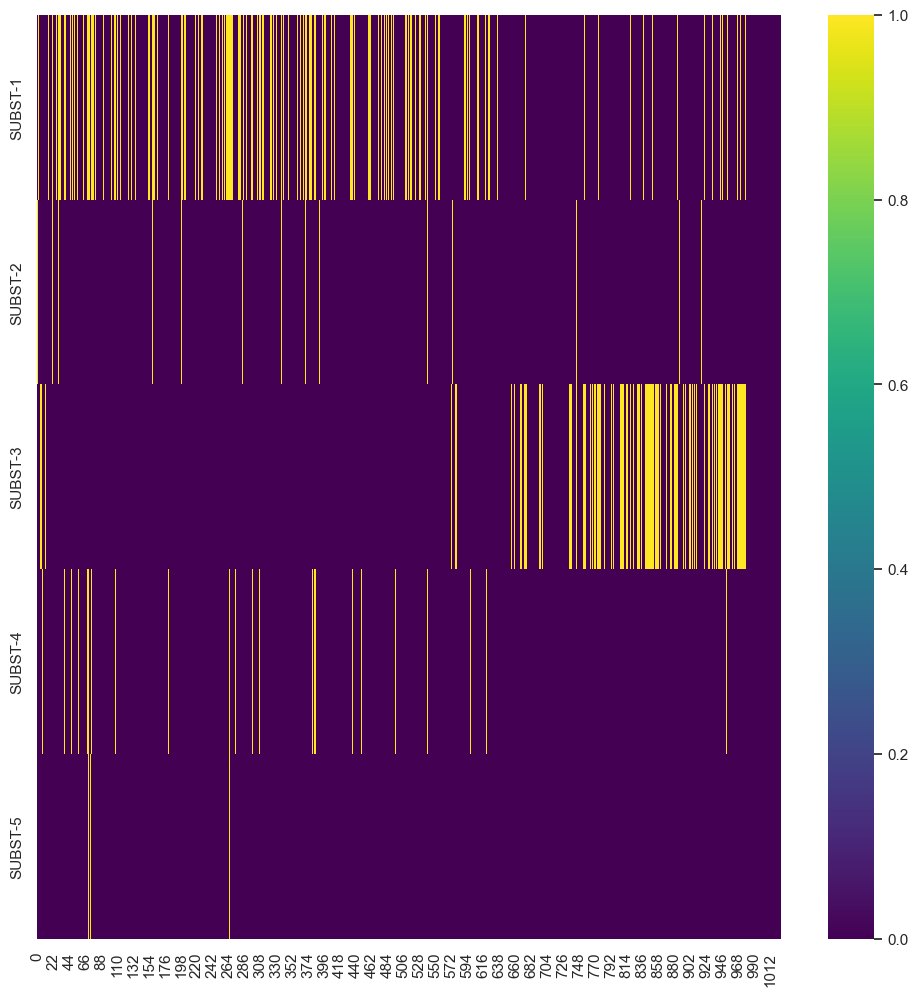

In [35]:
# sns heatmap of the substances
plt.figure(figsize = (12, 12))

sns.heatmap(substance_features.T, cmap = 'viridis', annot = False)

## MEDICATIONS
 - one hot encode

In [36]:
# medications
# note that we already dropped the empty medication columns above
# h/t to Maitray for a nice one liner list comp
MEDTEMP = [col for col in df_columns if "medication" in col and 'medication_received' not in col]
MEDTEMP

['medication1', 'medication2', 'medication3', 'medication4', 'medication5']

In [37]:
# what is the dtype in each column in MEDTEMP?
df[MEDTEMP].dtypes

df[MEDTEMP].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   medication1  130 non-null    object
 1   medication2  52 non-null     object
 2   medication3  26 non-null     object
 3   medication4  14 non-null     object
 4   medication5  6 non-null      object
dtypes: object(5)
memory usage: 40.3+ KB


In [38]:
# read medications dict from json
import json

with open("../OUTPUT/dict-medications.json", "r") as f:
    medication_dict = json.load(f)

# cast key to int
medication_dict = {int(k): v for k, v in medication_dict.items()}

In [39]:

med_df = pd.DataFrame()

print(f">>> constructing binary columns for each unique medication")
# get all of the unique values in the medication columns
all_meds = df[MEDTEMP].values
# drop the empty strings from the_vals
all_meds = [[val for val in row if val != ""] for row in all_meds]

# fill nans with 0
all_meds = [[val if val == val else 0 for val in row] for row in all_meds]

# count the unique values in all_meds
unique_meds = np.unique(np.concatenate(all_meds))

print(f">>> \t- will add    {len(unique_meds):>4d} NEW columns")
print(f">>> \t- will remove {len(MEDTEMP):>4d} OLD columns")
print(f">>> \t- net change  {len(unique_meds) - len(MEDTEMP):>4d} columns")

# use a multilabel binarizer to encode the values
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# we pass the values to fit_transform, which returns a numpy array
# we then wrap the numpy array in a pandas dataframe, using the 
# encoder's classes as the column names and the hx_df index as the index

encoded_meds = mlb.fit_transform(all_meds)
column_names = [f"meds_{med}" for med in mlb.classes_]
med_df = pd.DataFrame(encoded_meds, columns=column_names, index=df.index) # type: ignore

print(med_df.shape)


# drop the meds_0 column
try:
    med_df = med_df.drop(columns = "meds_0")
except KeyError:
    pass

# rename the columns using the medication_dict

for c in med_df.columns:

    # get the medication number from the column name
    mn = int(float(c.split("_")[1]))

    # look up the medication name in the medication_dict
    med_name = "MED-" + str.replace(medication_dict[mn], " ", "-")

    # rename the column
    med_df = med_df.rename(columns = {c: med_name})


>>> constructing binary columns for each unique medication
>>> 	- will add      73 NEW columns
>>> 	- will remove    5 OLD columns
>>> 	- net change    68 columns


TypeError: '<' not supported between instances of 'str' and 'int'

In [40]:
# originally, I was replacing the medication columns with the new ones
# however, we won't do that here, as we want to keep the original columns

# # drop the original meds columns
# try:
#     df = df.drop(columns = MEDTEMP)
# except KeyError:
#     pass
# # df = df.drop(columns = MEDICATIONS)

# # concatenate the med_df with the original df
# df = pd.concat([df, med_df], axis = 1)


# new name for medication columns
MEDICATIONS = med_df.columns.tolist()

medication_features = med_df

In [41]:
medication_features

""


In [42]:
medication_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Empty DataFrame


## HEALTH HISTORY

### Patient History

In [43]:
# find all columns with hhx in the name
HEALTH_GLOBAL = ["global"]
HHX_temp      = [col for col in df_columns if "past_hhx" in col]


In [44]:
# load a list of past hhx diags from the json file in OUTPUT

import json

with open("../OUTPUT/dict-past-hhx.json", "r") as f:
    past_hhx_dict = json.load(f)

# cast the key to an int
past_hhx_dict = {int(k): v for k, v in past_hhx_dict.items()}

In [45]:
# make a subset of the df with the past_hhx columns
hhx_df = df[HHX_temp]

# rename the columns with HHX- prefix
hhx_df.columns = [f"HHX-{past_hhx_dict[int(col.split('___')[1])]}" for col in hhx_df.columns]

hhx_df


,HHX-Arterial Hypertension,HHX-Pulmonary hypertension,HHX-Cardiovascular disease,HHX-Diabetes,HHX-Cancer,HHX-Immunosuppression,HHX-Chronic lung disease,HHX-Chronic kidney disease,HHX-Dialysis,HHX-Chronic liver disease,...,HHX-Heart failure,HHX-Coronary artery disease,HHX-Chronic hematologic disease,HHX-Malnutrition,HHX-COPD (emphysema,HHX-Psychiatric disease,HHX-Asthma,HHX-Rheumatologic disease,HHX-Past tuberculosis infection,HHX-Other
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# count HX items by site
# hx_by_site = df.groupby("dag")[HEALTH_HX].sum().astype(int)
hx_by_site = df.groupby("dag")[HHX_temp].sum().astype(int)

# calculate the fraction of each hx item by site
# hx_by_site = hx_by_site.div(hx_by_site.sum(axis = 1), axis = 0)

# map index using site name dict
hx_by_site = hx_by_site.rename(index = site_name_dict)
hx_by_site.T

dag,LDN,MTL,SAN,RIO,LUS
past_hhx___1,1,100,9,0,31
past_hhx___2,1,0,2,0,0
past_hhx___3,1,29,6,1,5
past_hhx___4,0,36,12,4,5
past_hhx___5,2,33,2,1,0
past_hhx___6,3,23,0,0,1
past_hhx___7,1,26,2,0,0
past_hhx___8,1,19,4,0,1
past_hhx___9,0,0,1,0,0
past_hhx___10,0,15,1,0,2


In [47]:
# missing values by site
print("Missing HEALTH_HX values by site:")
df.groupby('dag')[HHX_temp].apply(lambda x: x.isnull().sum()).rename(index = site_name_dict).T

Missing HEALTH_HX values by site:


dag,LDN,MTL,SAN,RIO,LUS
past_hhx___1,0,0,0,0,0
past_hhx___2,0,0,0,0,0
past_hhx___3,0,0,0,0,0
past_hhx___4,0,0,0,0,0
past_hhx___5,0,0,0,0,0
past_hhx___6,0,0,0,0,0
past_hhx___7,0,0,0,0,0
past_hhx___8,0,0,0,0,0
past_hhx___9,0,0,0,0,0
past_hhx___10,0,0,0,0,0


### One-hot encode `other_hhx`


In [48]:
# find cols that start with other_hhx
OTHER_HHX_TEMP = [col for col in df_columns if "other_hhx" in col]
OTHER_HHX_TEMP

['other_hhx', 'other_hhx_2', 'other_hhx_3']

In [49]:
df["other_hhx"].value_counts()

other_hhx
3.0     71
5.0     37
7.0     16
10.0    13
24.0    10
6.0      9
11.0     7
2.0      6
9.0      6
12.0     4
4.0      4
22.0     3
23.0     3
13.0     2
20.0     2
18.0     2
17.0     2
21.0     1
Name: count, dtype: int64

In [50]:
# read the other-hhx dict from json
import json

with open("../OUTPUT/dict-other-hx.json", "r") as f:
    other_hx_dict = json.load(f)

# cast key to int
other_hx_dict = {int(k): v for k, v in other_hx_dict.items()}


# use a multilabel binarizer to encode the values
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# we pass the values to fit_transform, which returns a numpy array
# we then wrap the numpy array in a pandas dataframe, using the 
# encoder's classes as the column names and the df index as the index

a = df[OTHER_HHX_TEMP].fillna(0).values

em = mlb.fit_transform(a)

column_names = [f"hhx-other-{int(c)}" for c in mlb.classes_]
other_hhx_features = pd.DataFrame(em, columns = column_names, index=df.index) # type: ignore

# drop the hhx-other-0 column
other_hhx_features.drop(columns = "hhx-other-0", inplace = True)

In [51]:

# rename the columns in qqq using the other_hx_dict
for c in other_hhx_features.columns:

    # get the  number from the column name
    num = int(float(c.split("-")[2]))

    # look up the  name in the medication_dict
    new_name = "HHX-OTHER-" + str.replace(other_hx_dict[num], " ", "-")

    # rename the column
    other_hhx_features = other_hhx_features.rename(columns = {c: new_name})

other_hhx_features

,HHX-OTHER-concussion,HHX-OTHER-hypo,HHX-OTHER-hyper,HHX-OTHER-MSK,HHX-OTHER-GI,HHX-OTHER-GERD,HHX-OTHER-IBS,HHX-OTHER-Sleep-disorder,HHX-OTHER-Crohn's-disease,HHX-OTHER-BPH,HHX-OTHER-OB,HHX-OTHER-resp,HHX-OTHER-UNSPECIFIED,HHX-OTHER-Celiac,HHX-OTHER-Anemia,HHX-OTHER-diverticulitis,HHX-OTHER-Derm,HHX-OTHER-ulcerative-colitis,HHX-OTHER-genetic-disorder,HHX-OTHER-surgery
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1024,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1025,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1026,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
# use get_dummies to one0hot encode the other_hhx column
# this assigns nans a value of zero by default.
# turning on the dummy_na flag will create a separate column for nans
# we would want to drop that column as it is not useful
# QUESTION: when taking a patient's history, is it safe to assume that they were asked "do you have any other health issues?" and if there is no response, the answer is "no"?

# this is only useful for a single column
# there are 4 cols of other_hhx, so we use the same method as for meds above.

# other_hhx_features = pd.get_dummies(
#                                     # df["other_hhx"], 
#                                     # columns = ["other_hhx"], 
#                                     df[OTHER_HHX_TEMP], 
#                                     columns = OTHER_HHX_TEMP, 
#                                     prefix = "OTHER-HHX", 
#                                     prefix_sep = "-", 
#                                     dtype = int, 
#                                     # dummy_na = True
#                                     )

# print(other_hhx_features.shape)

In [53]:
# missing other hhx values by site
print("Missing OTHER_HHX values by site:")
other_hhx_features.groupby(df['dag']).apply(lambda x: x.isnull().sum()).rename(index = site_name_dict).T

Missing OTHER_HHX values by site:


dag,LDN,MTL,SAN,RIO,LUS
HHX-OTHER-concussion,0,0,0,0,0
HHX-OTHER-hypo,0,0,0,0,0
HHX-OTHER-hyper,0,0,0,0,0
HHX-OTHER-MSK,0,0,0,0,0
HHX-OTHER-GI,0,0,0,0,0
HHX-OTHER-GERD,0,0,0,0,0
HHX-OTHER-IBS,0,0,0,0,0
HHX-OTHER-Sleep-disorder,0,0,0,0,0
HHX-OTHER-Crohn's-disease,0,0,0,0,0
HHX-OTHER-BPH,0,0,0,0,0


### Concatenate health history

In [54]:
# concatenate the health hx features with the other health hx features

# sort hhx_df columns
hhx_df = hhx_df.reindex(sorted(hhx_df.columns), axis=1)

# sort other_hhx_features columns
other_hhx_features = other_hhx_features.reindex(sorted(other_hhx_features.columns), axis=1)

# concatenate the health hx features with the other health hx features
hx_features_all = pd.concat([hhx_df, other_hhx_features], axis = 1)

In [55]:

# # sort alphabetically
# hx_features_all = hx_features_all.reindex(sorted(hx_features_all.columns), axis = 1)




In [56]:

# the global health assessment is a single column
# should we add it?
# hx_features_all["HHX-global"] = df["global"]


# df["global"].value_counts()
# how many missing values?
print(f"There are {df['global'].isna().sum()} missing values in the global health column")

# CONCLUSION: too many missing values in the global health assessment column
# we won't use it.


There are 698 missing values in the global health column


Text(0.5, 1.0, 'Health History Features')

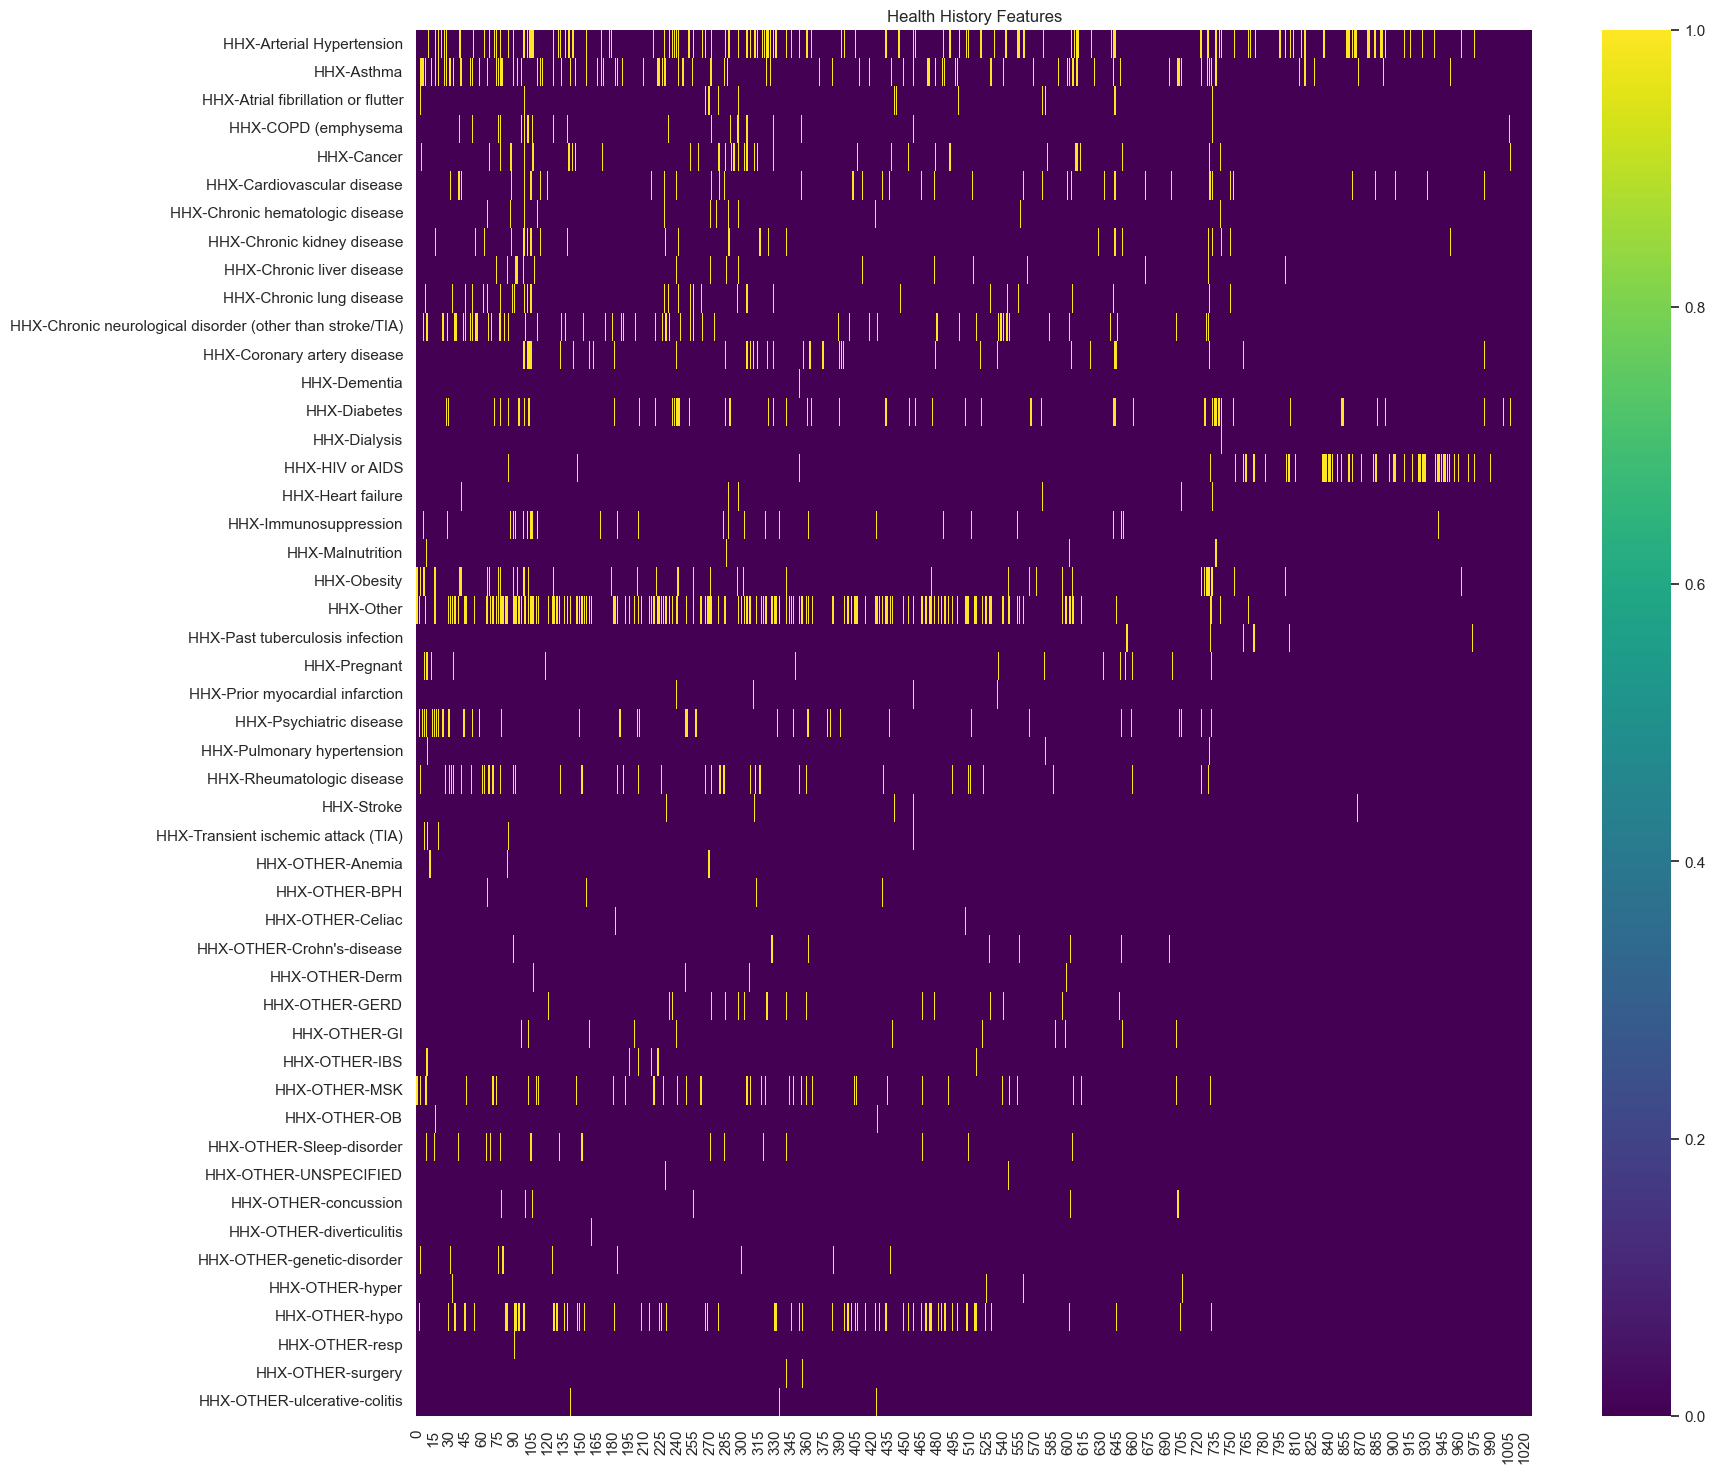

In [57]:
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(hx_features_all.T, cbar=True, ax = ax, cmap = 'viridis')
plt.title("Health History Features")

## SYMPTOMS

In [58]:
# read the list of symtpoms from the json file
import json
with open("../OUTPUT/list-symptoms.json", "r") as f:
    symptoms_list = json.load(f)

# get all columns that start with the symptoms list
SYMP = [col for col in df.columns if  col.startswith(tuple(symptoms_list))]

# feature set for symptoms
symptom_features = df[SYMP]



# given that the patients were asked to mark yes/no, we assume that no response is equivalent to a "no"
# QUESTION: is this reasonable?
# symptom_features = symptom_features.fillna(0)

# there are symptom features with a value of 2 - replace with 1
symptom_features = symptom_features.replace(2, 1)

# rename by prefixing sith SYMP
symptom_features.columns = [f"SYMPT-{col}" for col in symptom_features.columns]

# sort alphabetically
symptom_features = symptom_features.reindex(sorted(symptom_features.columns), axis=1)

symptom_features.shape

(1028, 56)

In [59]:
# how many nulls per site?
print("Missing SYMPTOM values by site:")
# df.groupby('dag')[SYMP].apply(lambda x: x.isnull().sum()).rename(index = site_name_dict).T

Missing SYMPTOM values by site:


<Axes: >

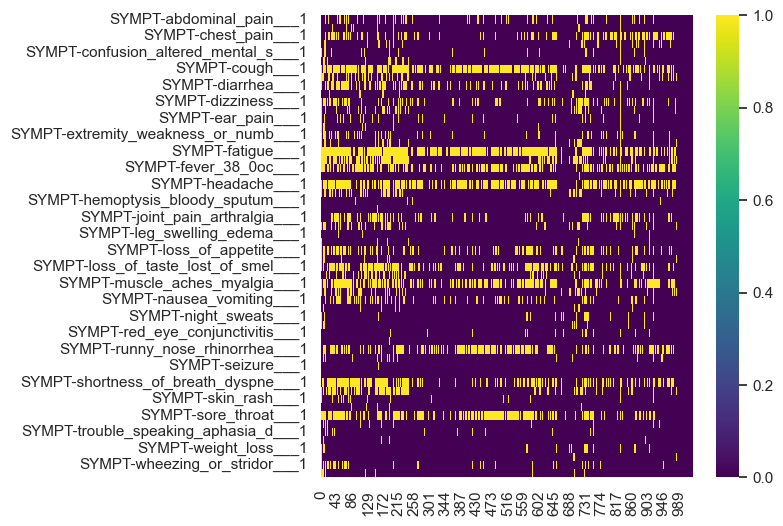

In [60]:
fig, ax = plt.subplots(figsize=(6,6))
# norm = mc.LogNorm(vmin=1, vmax=10)
sns.heatmap(symptom_features.T, cbar=True, ax = ax, norm = None,cmap = 'viridis')

## CLINICAL TESTS (AKA LABS)


- all zero: lung_function, metacholine, spirometry
- consider dropping: ct*, cx*, echo*, ekg* - similarly, mostly empty
- consider dropping features with < 200 items

In [61]:

s = "igg	wbc	neutrophil	neutrophil_count	lymphocyte	lymphocyte_count	monocyte	monocyte_count	eosinophil	eosinophil_count	basophil	basophil_count	platelets	haemoglobin	urea	creatinine	ntprobnp	bnp	sodium	potassium	crp	ldh	cpk	albumin		ast	alt	pct	troponinthigh	troponinihigh	troponint	troponini	aptt	inr	triglycerides	bilirubin	bilirubin_direct	glucose	fibrinogen	ferritin	il6	cd4	cd8	angiography	pocus	echocardiogram	echoresult	ekg	ekgresult	ekgcode	stented	cxr	cxrresult	cxrcode	cta	ctaresult	ctt	cttresult	cth	cthresult	imaging_results	imaging	spirometry	spirometryresult	metacholine	lung_function	lung_functionresult"
words = s.split()
words.sort()
CLINICAL_TESTS = words

# remove imaging_results from the list
CLINICAL_TESTS.remove("imaging_results")

In [62]:
# remove columns that have less than 200 non-null points
# CLINICAL_TESTS = [col for col in CLINICAL_TESTS if df[col].count() > 200]

### Investigate some of the features

In [63]:

# drop features starting with ctt and cx
# CLINICAL_TESTS = [col for col in CLINICAL_TESTS if not col.startswith(("ctt", "cth", "cta", "cx", "echo", "ekg"))]


In [64]:
# count items that start with ct
df.filter(regex='^ct', axis = 1).count()

cta    289
ctt    300
cth    289
dtype: int64

In [65]:
df["ctaresult"].value_counts(), df["cttresult"].value_counts(), df["cthresult"].value_counts()

KeyError: 'ctaresult'

In [ ]:
# CTA, CTT, CTH - most of the results are 2 - no report
# CONCLUSION: recommend dropping these - there are very few discriminant results

In [ ]:
# count items that start with ct
df.filter(regex='^cx', axis = 1).count()

cxr          293
cxrresult      0
cxrcode        0
dtype: int64

In [66]:
# count cxr code values
df["cxrresult"].value_counts()

# most are no-result. Of the 39 that are a positive finding, what are the results?

KeyError: 'cxrresult'

In [67]:
df["cxrcode"].value_counts()

# 33 fluid, etc
# 3 fibrosis
# 2 nodules, cysts
# 2 congestive heart disease etc

KeyError: 'cxrcode'

In [68]:
# CONCLUSION: recommend dropping these too - very small numbers

In [69]:
# now echo
# count items that start with ct
df.filter(regex='^echo', axis = 1).count()

echocardiogram    296
dtype: int64

In [70]:
df["echoresult"].value_counts()
# mostly no reports, 7 positive findings

KeyError: 'echoresult'

In [71]:
# finally, ekg
print(df.filter(regex='^ekg', axis = 1).count())

print(df["ekgresult"].value_counts())

print(df["ekgcode"].value_counts())

# ekgcode results indicate 
# 10 sinus bradycardia
# 2 atrioventricular block
# 1 each of supraventricular, sinus tachy, infarction

# CONCLUSION: still recommend dropping all of the ct*, cx*, echo*, ekg* 
# numbers are very very small

ekg    298
dtype: int64


KeyError: 'ekgresult'

In [72]:
# OTHER FEATURES:
# - angiography is 7 zeroes and the rest blank
# - imaging = 12 records, imaging_results all blank
# - spirometry = 2053 records
# - spriometry_result = 27 records, of which 7 neg, 12 no report, 8 positive
# - lung_function_result = 31 records, 17 neg, 6 no report, 8 positive

In [73]:
# count all values in features
df[CLINICAL_TESTS].info()


KeyError: "['ctaresult', 'cthresult', 'cttresult', 'cxrcode', 'cxrresult', 'echoresult', 'ekgcode', 'ekgresult', 'lung_functionresult', 'spirometryresult', 'troponint'] not in index"

In [74]:
# CONCLUSION SUMMARY
# drop cx*, ct*, echo*, ekg*, angiography, imaging, spiromoetry, lung_function, cd4, cd8, stented, tropinin, igg, 

In [75]:
# drop the columns
CLINICAL_TESTS = [col for col in CLINICAL_TESTS if not col.startswith(("ctt", "cth", "cta", "cx", "echo", "ekg", "angiography", "imaging", "spirometry", "lung_function", "cd4", "cd8", "stented", "troponin", "pocus", "igg", "ntprobnp", "bnp"))]

df[CLINICAL_TESTS].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   albumin           92 non-null     float64
 1   alt               106 non-null    float64
 2   aptt              46 non-null     float64
 3   ast               78 non-null     float64
 4   basophil          45 non-null     float64
 5   basophil_count    45 non-null     float64
 6   bilirubin         126 non-null    float64
 7   bilirubin_direct  35 non-null     float64
 8   cpk               55 non-null     float64
 9   creatinine        138 non-null    float64
 10  crp               98 non-null     float64
 11  eosinophil        44 non-null     float64
 12  eosinophil_count  47 non-null     float64
 13  ferritin          53 non-null     float64
 14  fibrinogen        51 non-null     float64
 15  glucose           94 non-null     float64
 16  haemoglobin       132 non-null    float64


Text(0.5, 1.0, 'Clinical Tests')

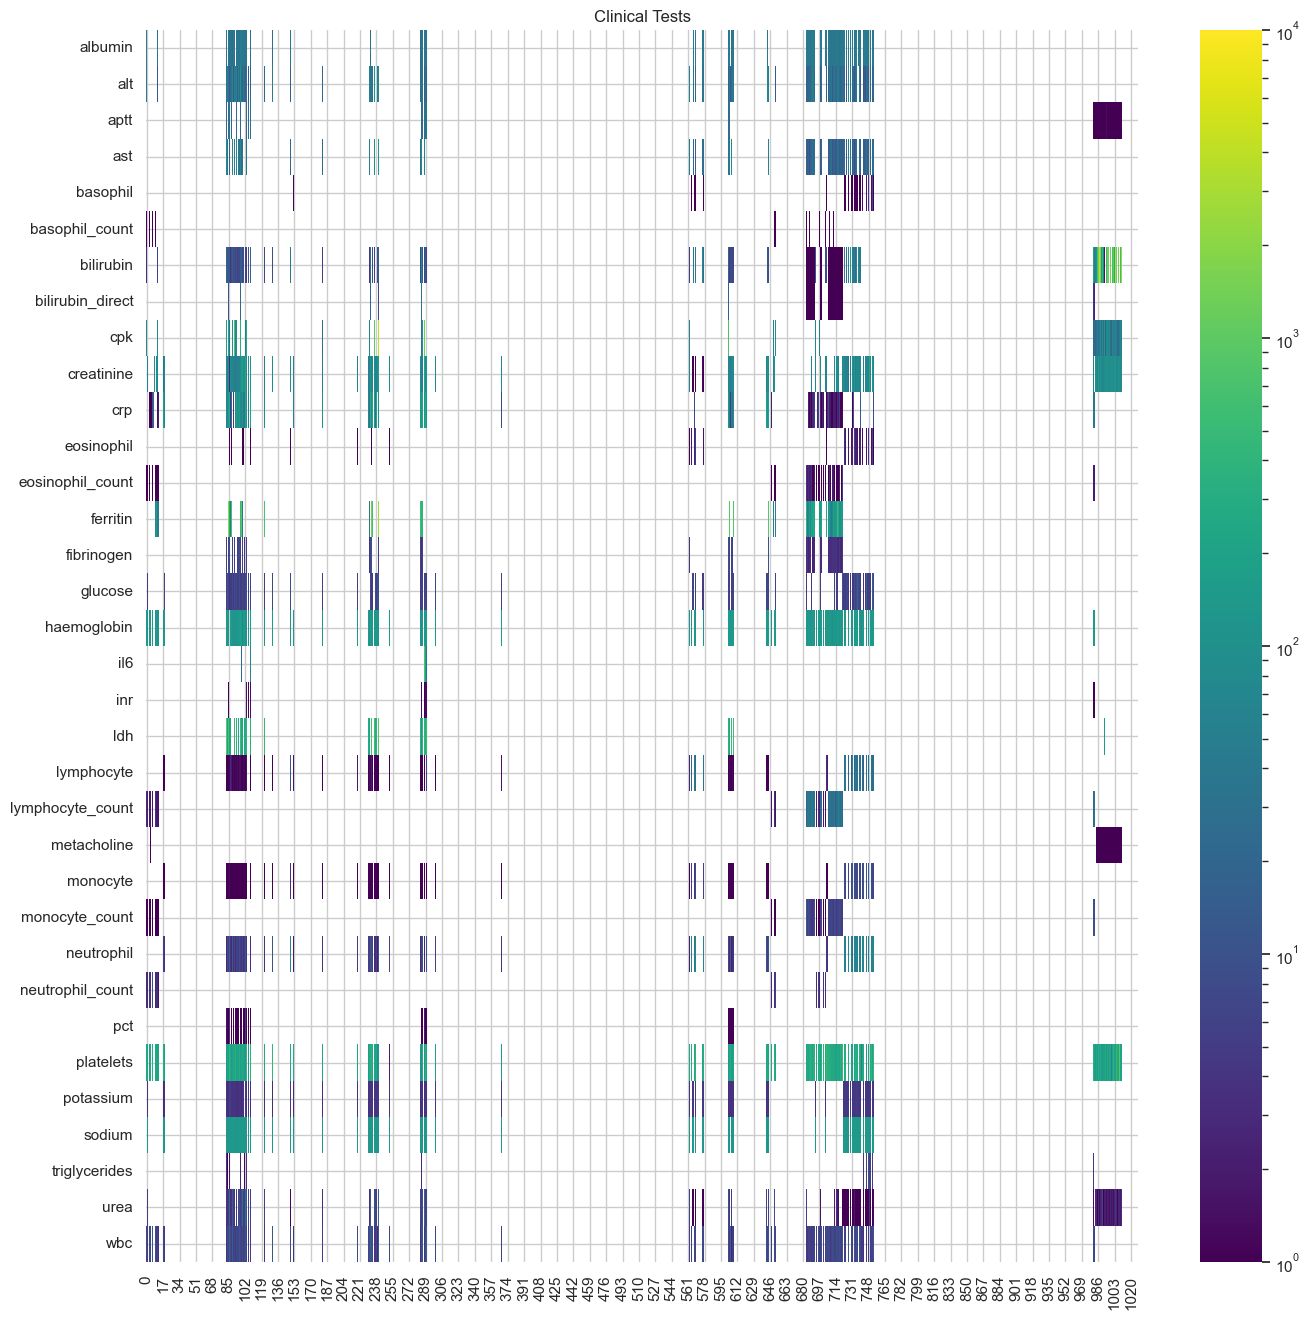

In [76]:
fig, ax = plt.subplots(figsize=(16,16))
norm = mc.LogNorm(vmin=1, vmax=10_000)
sns.heatmap(df[CLINICAL_TESTS].T, cbar=True, ax = ax, norm = norm, cmap = 'viridis')
plt.title("Clinical Tests")

In [79]:
df

,record_id,sex,age,home_location,living_with,country,employed,occupation,occupation2,number_of_persons_in_house,...,LC_STATUS,dag,labelnumber,Sample_Label_ID,datetime_collection,datetime_freezing,aliquots,biospecimen_collection_not,biospecimen_used___1,biospecimen_complete
0,1.0,1.0,47.0,1.0,3.0,42,1.0,Engineering Technologist,7.0,NaN,...,1.0,1.0,1.0,LDN-0001,2023-12-15 15:10:00,2023-12-15 15:36:00,H,"Sample lipemic TV = 6 x 250uL (A-F), 2 x 500u...",1.0,2.0
1,2.0,2.0,37.0,1.0,1.0,16,0.0,NaN,NaN,3.0,...,1.0,1.0,2.0,LDN-0002,2023-12-18 08:15:00,2023-12-18 08:56:00,H,4 x 250uL (A-D) 4 x 500uL (E-H),1.0,2.0
2,3.0,2.0,54.0,1.0,1.0,16,1.0,Administrator,3.0,NaN,...,1.0,1.0,3.0,LDN-0003,2023-12-18 08:40:00,2023-12-18 09:05:00,H,5 x 250uL (A-E) 3 x 500uL (F-H),1.0,2.0
3,4.0,1.0,78.0,1.0,1.0,62,0.0,NaN,NaN,2.0,...,1.0,1.0,4.0,LDN-0004,2024-01-05 13:34:00,2024-01-05 14:28:00,G,NaN,1.0,2.0
4,5.0,2.0,33.0,1.0,1.0,16,1.0,Nurse,11.0,2.0,...,1.0,1.0,5.0,LDN-0005,2024-01-05 14:03:00,2024-01-05 14:55:00,G,"No Sample ""E""",1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,6118.0,2.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,12.0,HC-0012,NaT,NaT,NaN,NaN,1.0,2.0
1024,6119.0,2.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,13.0,HC-0013,NaT,NaT,NaN,NaN,1.0,2.0
1025,6120.0,2.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,14.0,HC-0014,NaT,NaT,NaN,NaN,1.0,2.0
1026,6121.0,2.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,15.0,HC-0015,NaT,NaT,NaN,NaN,1.0,2.0


In [77]:
# how many nulls per site?
print("Missing CLINICAL values by site:")
df.groupby('dag')[CLINICAL_TESTS].apply(lambda x: x.isnull().sum()).rename(index = site_name_dict).T.map(lambda x: f"{x:,}") # type: ignore


Missing CLINICAL values by site:


dag,LDN,MTL,SAN,RIO,LUS
albumin,42,580,25,39,250
alt,42,566,25,39,250
aptt,46,598,52,36,250
ast,46,590,25,39,250
basophil,44,594,29,66,250
basophil_count,28,614,52,39,250
bilirubin,41,568,34,9,250
bilirubin_direct,46,608,52,37,250
cpk,40,595,52,36,250
creatinine,37,555,19,29,250


In [82]:
# how many nulls by LC_STATUS?
print("Missing CLINICAL values by LC_STATUS:")
df.groupby('LC_STATUS')[CLINICAL_TESTS].apply(lambda x: x.isnull().sum()).T.map(lambda x: f"{x:,}") # type: ignore

Missing CLINICAL values by LC_STATUS:


LC_STATUS,0.0,1.0,2.0
albumin,477,419,40
alt,476,406,40
aptt,461,481,40
ast,479,431,40
basophil,480,463,40
basophil_count,493,450,40
bilirubin,453,409,40
bilirubin_direct,493,460,40
cpk,462,471,40
creatinine,443,407,40


## CLINICAL DETAILS

In [83]:
# read the list of symtpoms from the json file
import json
with open("../OUTPUT/list-clin-details.json", "r") as f:
    cd_list = json.load(f)

# get all columns that start with the symptoms list
CD = [col for col in df.columns if  col.startswith(tuple(cd_list))]

# delete items that sstart with phx and phq
# the are scooped up by accident because cd_list contains "ph"
CD = [col for col in CD if not col.startswith(("phx", "phq"))]

# feature set for symptoms
cd_features = df[CD]

# preprend CLIN- to the column names
cd_features.columns = [f"CD-{col}" for col in cd_features.columns]

# find spaces in the data and replace with zero
cd_features = cd_features.replace(" ", 0)

In [84]:
cd_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Columns: 320 entries, CD-pregnant to CD-o2_saturation
dtypes: datetime64[ns](9), float64(310), object(1)
memory usage: 2.5+ MB


In [85]:
# drop columns with dtype datetime64
cd_features = cd_features.select_dtypes(exclude = ['datetime64'])
cd_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Columns: 311 entries, CD-pregnant to CD-o2_saturation
dtypes: float64(310), object(1)
memory usage: 2.4+ MB


In [86]:
# which cols are of type object?
cd_features.select_dtypes(include = ['object']).columns

Index(['CD-specify_other_med'], dtype='object')

In [87]:
# drop the object columns as they are either dates or mostly spaces
cd_features = cd_features.select_dtypes(exclude = ['object'])
cd_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Columns: 310 entries, CD-pregnant to CD-o2_saturation
dtypes: float64(310)
memory usage: 2.4 MB


Text(0.5, 1.0, 'CLINICAL DETAIL Status- missing values are light coloured')

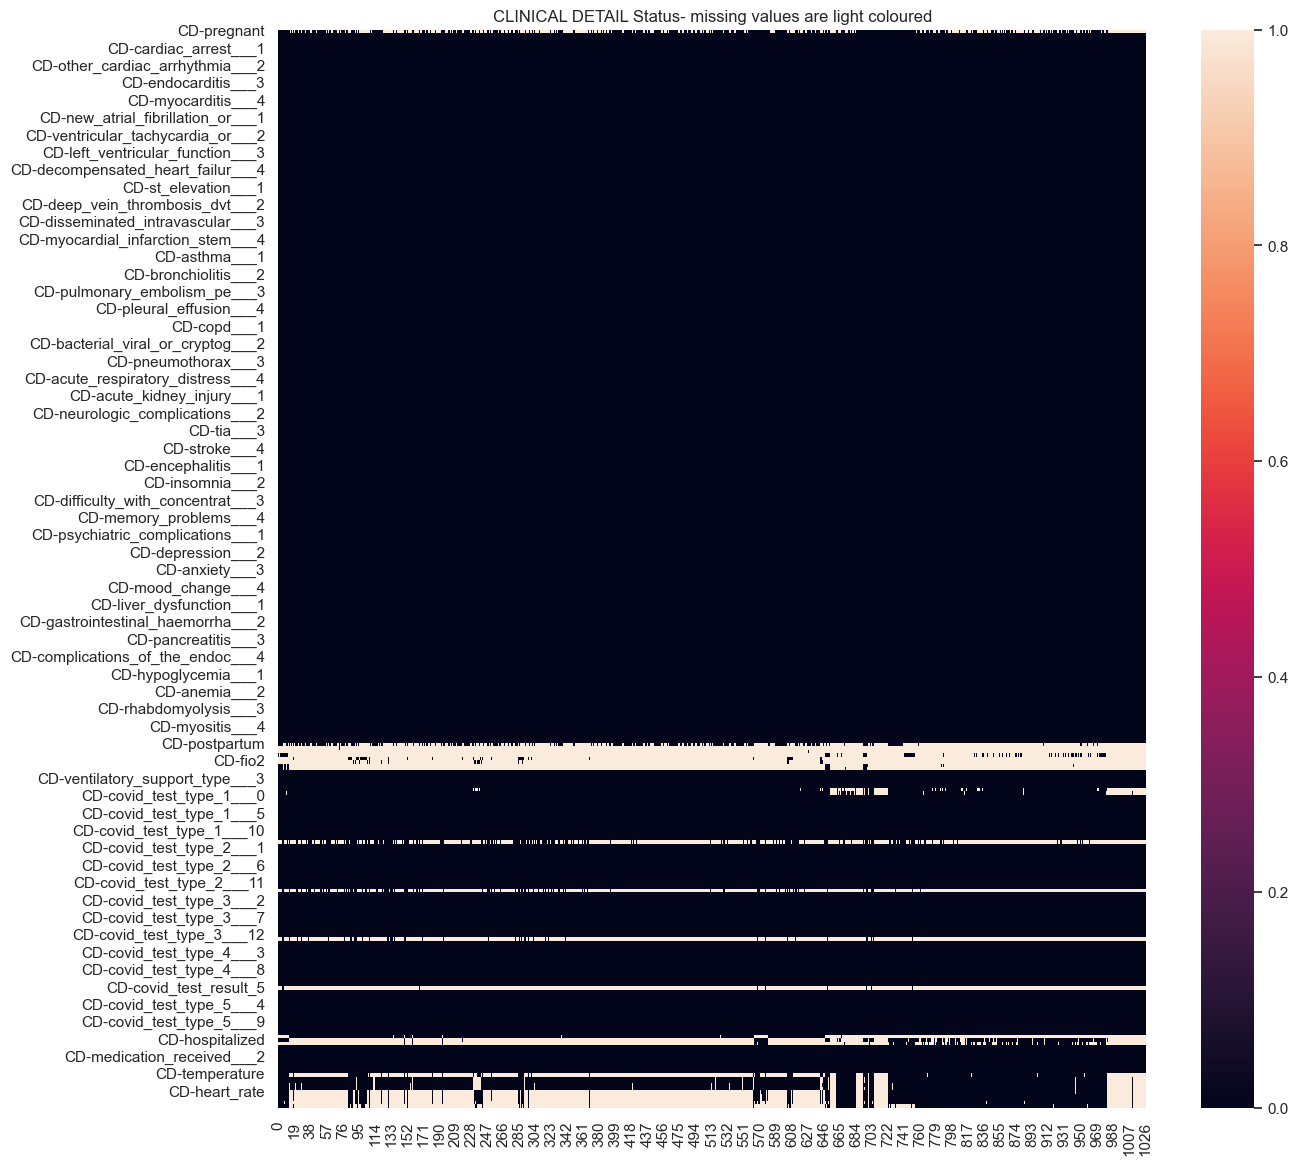

In [88]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(14, 14))

sns.heatmap(cd_features.isnull().T, cbar=True, ax = ax, )
plt.title("CLINICAL DETAIL Status- missing values are light coloured")

In [89]:
# these features are not very informative - consider dropping them
cd_features = cd_features.drop(columns = cd_features.filter(like = "test_type").columns)

# height in metres and centimetres is redundant
# drop the height in cm
cd_features = cd_features.drop(columns = "CD-height_cm")

cd_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Columns: 244 entries, CD-pregnant to CD-o2_saturation
dtypes: float64(244)
memory usage: 1.9 MB


In [90]:
# sort alphabetically
cd_features = cd_features.reindex(sorted(cd_features.columns), axis=1)

Text(0.5, 1.0, 'CLINICAL DETAIL Status - missing values are light coloured')

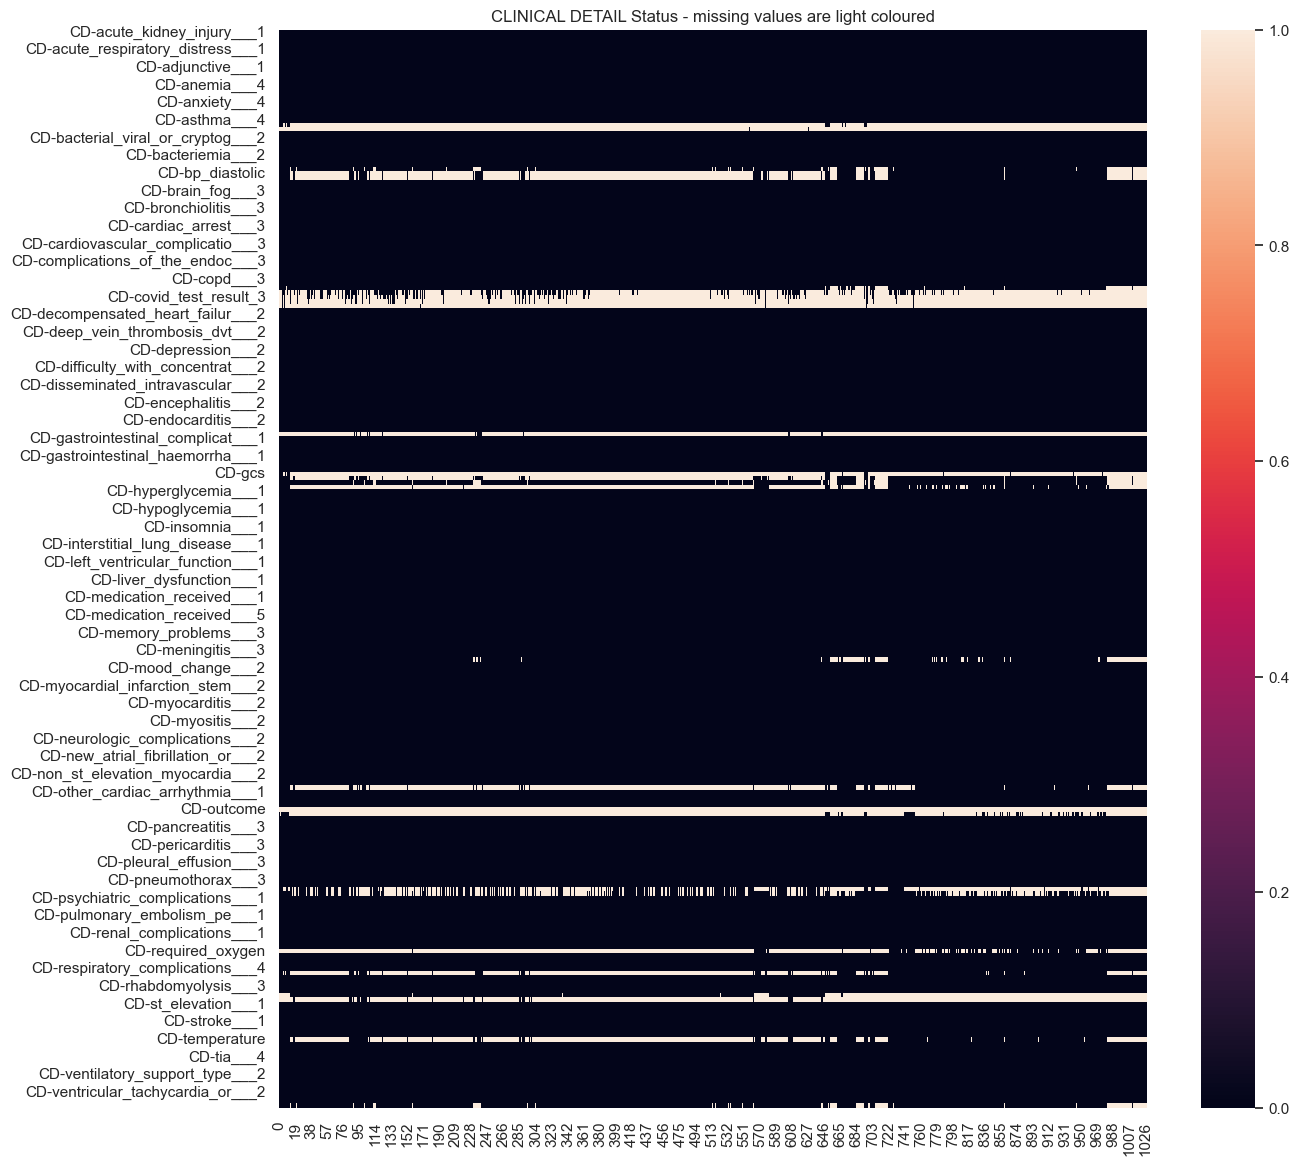

In [91]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(14, 14))

sns.heatmap(cd_features.isnull().T, cbar=True, ax = ax, )
plt.title("CLINICAL DETAIL Status - missing values are light coloured")

In [92]:
# missing values by site
print("Missing CLINICAL DETAILS values by site:")

cd_features.groupby(df['dag']).apply(lambda x: x.isnull().sum()).rename(index = site_name_dict).T

Missing CLINICAL DETAILS values by site:


dag,LDN,MTL,SAN,RIO,LUS
CD-acute_kidney_injury___1,0,0,0,0,0
CD-acute_kidney_injury___2,0,0,0,0,0
CD-acute_kidney_injury___3,0,0,0,0,0
CD-acute_kidney_injury___4,0,0,0,0,0
CD-acute_respiratory_distress___1,0,0,0,0,0
...,...,...,...,...,...
CD-ventricular_tachycardia_or___1,0,0,0,0,0
CD-ventricular_tachycardia_or___2,0,0,0,0,0
CD-ventricular_tachycardia_or___3,0,0,0,0,0
CD-ventricular_tachycardia_or___4,0,0,0,0,0


## VACCINES

In [93]:
# patient vaccination status
VAX_STATUS = ["vaccinated"]

# given a list of substrings, find aall columns that contain the substrings
def find_columns(df_columns, substrings):
    return [col for col in df_columns if any(substring in col for substring in substrings)]

VAX = find_columns(df_columns, ["astra_zeneca", "pfizer", "moderna", "j_j", "sinoppharm", "sinovac", "sputnik", "other___"])

# unstructured text - save for later analysis
VAX_SIDE_EFFECTS = find_columns(df_columns, ["vac_sideeffect"])

# QUESTION: is the assumption to fill blank values with 0 correct?
# df[VAX] = df[VAX].fillna(0)

# use all features
# vax_features = df[VAX_STATUS + VAX]

# for now, select only vaccine status
vax_features = df[VAX_STATUS]

print(vax_features.shape)

# prefix VAX- to the column names
vax_features.columns = [f"VAX-{col}" for col in vax_features.columns]


(1028, 1)


In [94]:
vvv = pd.concat([df[VAX], df['dag']], axis = 1)

In [95]:
vl = vvv.groupby('dag').sum().T.sum()
vl

dag
1.0      65.0
2.0    1738.0
3.0     172.0
4.0     106.0
5.0     298.0
dtype: float64

In [96]:
pd.concat([vax_features, df['dag']], axis = 1).groupby('dag').sum().T.sum()

dag
1.0     21.0
2.0    610.0
3.0     47.0
4.0     44.0
5.0    202.0
dtype: float64

In [97]:
# how many rows with dag = 5?
vvv.query('dag == 5').shape

(250, 131)

In [98]:
# get a subset of vvv for dag = 5
vl = vvv.query('dag == 5').head()

# how many nans per column?
vl.isnull().sum()


astra_zeneca2___1    0
astra_zeneca2___2    0
astra_zeneca2___3    0
astra_zeneca2___4    0
astra_zeneca2___5    0
                    ..
other___7            0
other___8            0
other___9            0
other___10           0
dag                  0
Length: 131, dtype: int64

In [99]:
vl

,astra_zeneca2___1,astra_zeneca2___2,astra_zeneca2___3,astra_zeneca2___4,astra_zeneca2___5,astra_zeneca2___6,astra_zeneca2___7,astra_zeneca2___8,astra_zeneca2___9,astra_zeneca2___10,...,other___2,other___3,other___4,other___5,other___6,other___7,other___8,other___9,other___10,dag
661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,5.0
662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,5.0
663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,5.0
664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,5.0
665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,5.0


In [100]:
# count non-zero values per dag
vvv.groupby(df['dag']).apply(lambda x: x.astype(bool).sum(axis=0)).rename(index = site_name_dict)

,astra_zeneca2___1,astra_zeneca2___2,astra_zeneca2___3,astra_zeneca2___4,astra_zeneca2___5,astra_zeneca2___6,astra_zeneca2___7,astra_zeneca2___8,astra_zeneca2___9,astra_zeneca2___10,...,other___2,other___3,other___4,other___5,other___6,other___7,other___8,other___9,other___10,dag
dag,,,,,,,,,,,,,,,,,,,,,
LDN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,46
MTL,0,0,0,0,0,0,0,0,0,0,...,340,391,128,76,0,0,0,0,0,614
SAN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,52
RIO,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,66
LUS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,250


Text(0.5, 1.0, 'Vaccination Status - missing values are light coloured')

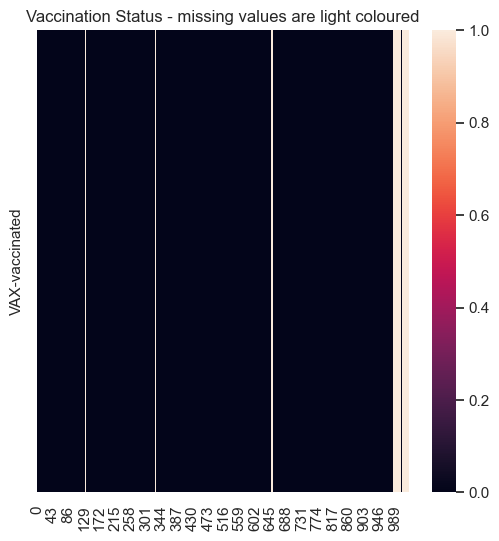

In [101]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(6,6))

sns.heatmap(vax_features.isnull().T, cbar=True, ax = ax, )
plt.title("Vaccination Status - missing values are light coloured")

In [102]:
# how many missing values per dag?
print("Missing VAX values by site:")
vax_features.groupby(df['dag']).apply(lambda x: x.isnull().sum()).rename(index = site_name_dict).T

Missing VAX values by site:


dag,LDN,MTL,SAN,RIO,LUS
VAX-vaccinated,22,3,0,21,1


In [103]:
# # how many nulls per site?
# print("Missing VACCINE values by site:")
# df.groupby('dag')[VAX + VAX_STATUS].apply(lambda x: x.isnull().sum()).rename(index = site_name_dict).T


### CONCLUSION:
- use only the vaccine status (binary)

# SAVE FEATURES TO FILE

- fill  na with 0 in vax, symptoms
- 

In [105]:
# concatenate all of the features
features = pd.concat([
                        demographic_features, 
                        symptom_features, 
                        vax_features,
                        hx_features_all, 
                        cd_features,
                        # WIP: 
                        # medication_features, 
                        # 
                        # NOT SELECTED:
                        # lab_features, - not enough data
                        # survey_features,    # not selected
                        # substance_features, # not selected
                      ], axis = 1)

features["LC_STATUS"] = df["LC_STATUS"]

In [106]:
features.shape

(1028, 354)

In [107]:
# count the nulls per site
print("Missing values by site:")

features.groupby('dag').apply(lambda x: x.isnull().sum()).rename(index = site_name_dict).T.sum()

Missing values by site:


/var/folders/sb/yk61ysxx3bq0fh_vt074lv6w0000gn/T/ipykernel_17567/4098030052.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  features.groupby('dag').apply(lambda x: x.isnull().sum()).rename(index = site_name_dict).T.sum()


dag
LDN      777
MTL    11652
SAN      686
RIO     1762
LUS     3521
dtype: int64

Text(0.5, 1.0, 'Missing values - light coloured cells are missing')

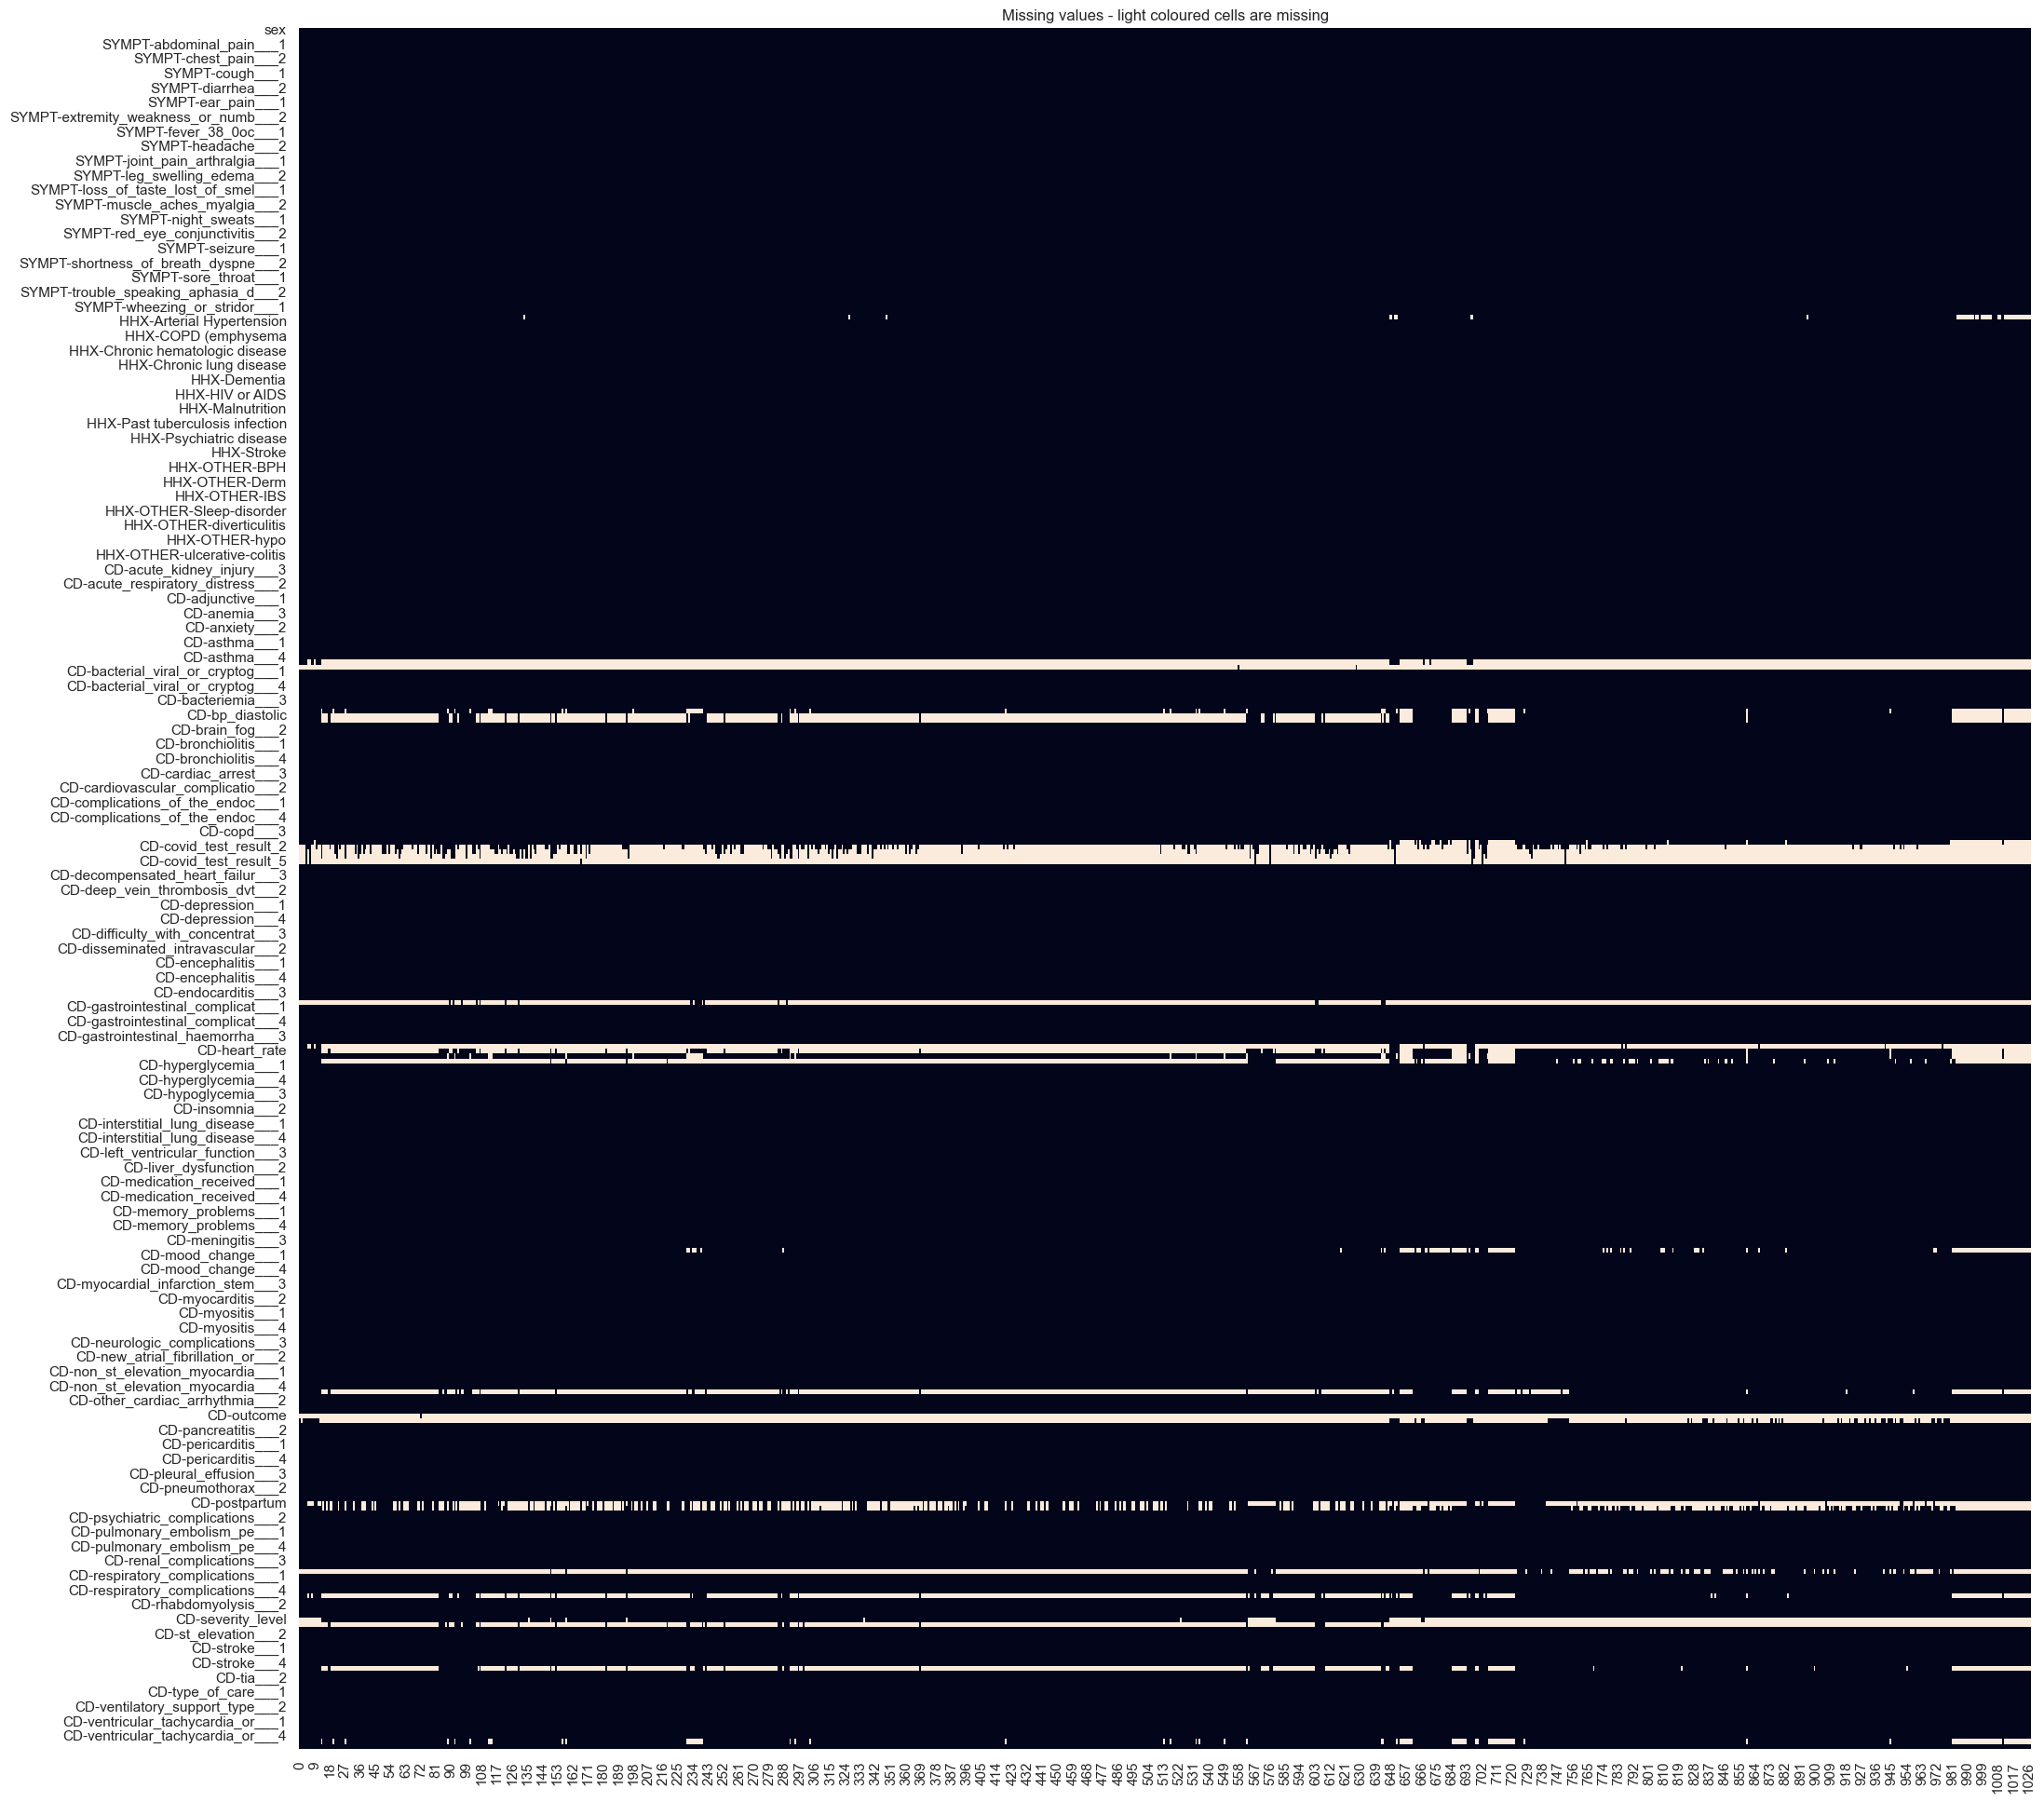

In [108]:
fig, ax = plt.subplots(figsize=(24, 24))

sns.heatmap(features.isnull().T, cbar=False, ax = ax)

plt.title("Missing values - light coloured cells are missing")

In [109]:

# using the arrow dataset format is way faster than excel
# ~0.0s vs > 15s for the excel file

import datasets

fn = p / "1028-features.arrow"

# make a dataset
ds = datasets.arrow_dataset.Dataset.from_pandas(features)
ds.save_to_disk(fn)

Saving the dataset (0/1 shards):   0%|          | 0/1028 [00:00<?, ? examples/s]